<a href="https://colab.research.google.com/github/june1st/GoogleColab/blob/master/RNNtest_n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from matplotlib import pyplot as plt

# データの用意

IMDb(※)のデータセットを使用します。  
ここで使うのは映画のレビュー文章に、そのレビューが"良い"評価をしているのか"悪い"評価をしているのかのラベルをつけたデータセットです。

※ IMDb : https://www.imdb.com/interfaces/

次のコードによってダウンロードできます。  
ダウンロードされたデータ自体は`~/.keras/datasets/imdb.npz`に保存されます。`~`はホームディレクトリを表しています。

In [2]:
from keras.datasets import imdb
train, test = imdb.load_data()

#　エラーになる場合は補足資料を参照

Using TensorFlow backend.


17465344/17464789 [==============================] - 3s 0us/step


In [3]:
# 後に使用する辞書データの読み込み（必須ではないです）
words = imdb.get_word_index()

1646592/1641221 [==============================] - 1s 1us/step


## データの内容

### データ数
train : 25000データ  
test : 25000データ

In [4]:
print(train[0].shape)
print(test[0].shape)

(25000,)
(25000,)


### データの形式
`train` や `test` は `(x, y)` という形になっています。（タプルと呼ばれる型です。）  
そして`x`や`y`は各データが入った配列になっています。(numpyのarray型です。)

`x[i]` : `i`番目の文章データ(前処理済み)
- 文章を単語ごとに区切り、単語の出現頻度順位 ( 3 ~ ) に置き換えたリストです。  
- `i`によってリストの長さは異なります。

`y[i]` : `i`番目のデータのラベル ( 1 or 0 )
- 1: "良い"評価
- 0: "悪い"評価

In [5]:
print(len(train[0][0]))
print(train[0][0])

218
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [6]:
print(train[1][0])

1


In [7]:
print(len(train[0][1]))
print(train[0][1])

189
[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 4369, 5012, 134, 26, 4, 715, 8, 118, 1634, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 3103, 21, 14, 69, 188, 8, 30, 23, 7, 4, 249, 126, 93, 4, 114, 9, 2300, 1523, 5, 647, 4, 116, 9, 35, 8163, 4, 229, 9, 340, 1322, 4, 118, 9, 4, 130, 4901, 19, 4, 1002, 5, 89, 29, 952, 46, 37, 4, 455, 9, 45, 43, 38, 1543, 1905, 398, 4, 1649, 26, 6853, 5, 163, 11, 3215, 10156, 4, 1153, 9, 194, 775, 7, 8255, 11596, 349, 2637, 148, 605, 15358, 8003, 15, 123, 125, 68, 23141, 6853, 15, 349, 165, 4362, 98, 5, 4, 228, 9, 43, 36893, 1157, 15, 299, 120, 5, 120, 174, 11, 220, 175, 136, 50, 9, 4373, 228, 8255, 5, 25249, 656, 245, 2350, 5, 4, 9837, 131, 152, 491, 18, 46151, 32, 7464, 1212, 14, 9, 6, 371, 78, 22, 625, 64, 1382, 9, 8, 168, 145, 23, 4, 1690, 15, 16, 4, 1355, 5, 28, 6, 52, 154, 462, 33, 89, 78, 285, 16, 145, 95]


### 具体的な文章

In [0]:
# "単語　→　順位"　という辞書から "順位　→　単語"　という辞書を作る
words_i = dict([(v, k) for k,v in words.items()])

In [9]:
words_i[4]

'of'

In [10]:
s = ''
for idx in train[0][0]:
    s += words_i.get(idx - 3, '?') + ' '
s

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should b

In [11]:
s = ''
for idx in train[0][1]:
    s += words_i.get(idx - 3, '?') + ' '
s

"? big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal measures the hair is big lots of boobs bounce men wear those cut tee shirts that show off their stomachs sickening that men actually wore them and the music is just synthesiser trash that plays over and over again in almost every scene there is trashy music boobs and paramedics taking away bodies and the gym still doesn't close for bereavement all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then "

In [12]:
train[1][1]

0

In [13]:
s = ''
for idx in train[0][0]:
    s += words_i.get(idx - 3, '?') + ' '
s

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should b

In [14]:
train[1][17934]

1

In [15]:
s = ''
for idx in test[0][0]:
    s += words_i.get(idx - 3, '?') + ' '
s

"? please give this one a miss br br kristy swanson and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite lacklustre so all you madison fans give this a miss "

In [16]:
test[1][0]

0

In [17]:
s = ''
for idx in test[0][1]:
    s += words_i.get(idx -3, '?') + ' '
s

"? this film requires a lot of patience because it focuses on mood and character development the plot is very simple and many of the scenes take place on the same set in frances austen's the sandy dennis character apartment but the film builds to a disturbing climax br br the characters create an atmosphere rife with sexual tension and psychological trickery it's very interesting that robert altman directed this considering the style and structure of his other films still the trademark altman audio style is evident here and there i think what really makes this film work is the brilliant performance by sandy dennis it's definitely one of her darker characters but she plays it so perfectly and convincingly that it's scary michael burns does a good job as the mute young man regular altman player michael murphy has a small part the solemn moody set fits the content of the story very well in short this movie is a powerful study of loneliness sexual repression and desperation be patient soak

In [18]:
test[1][1]

1

#### インデックスの最大値

In [19]:
max_index = max([max(x) for x in train[0]] + [max(x) for x in test[0]])
max_index

88586

### 各単語の出現回数

In [20]:
idx = 88584
word = words_i[idx]
print('word : ', word)
wsum = 0
for x in train[0] + test[0]:
    for w in x:
        if w == idx + 3:
            wsum = wsum + 1
print(wsum, ' times')

word :  'l'
0  times


### 文章の長さ

何度か使うので長さを要素とするarrayを作っておきます。

In [0]:
x_train_len = np.array([len(x) for x in train[0]])
x_test_len = np.array([len(x) for x in test[0]])

#### 最大の長さを見てみると...

In [22]:
print(x_train_len.max())
print(x_test_len.max())

2494
2315


#### 念のため平均を計算

In [23]:
print(x_train_len.mean())
print(x_test_len.mean())

238.71364
230.8042


#### 分布を確認

最大値はかなり外れた値であることが想像できるので、実際に分布を確認してみます。

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')


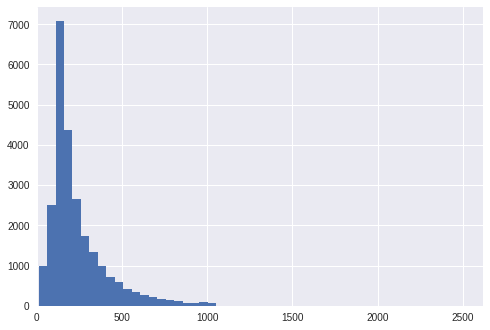

In [24]:
# train
plt.figure()
plt.hist(x_train_len, bins=50)
plt.xlim(xmin=0)
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')


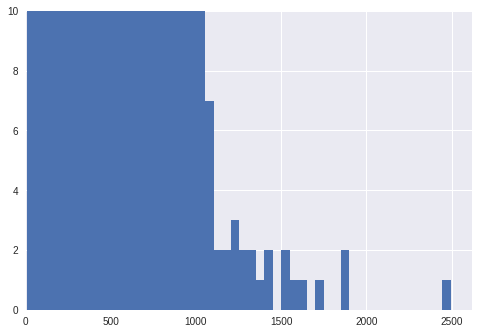

In [25]:
# train, 縦に拡大
plt.figure()
plt.hist(x_train_len, bins=50)
plt.xlim(xmin=0)
plt.ylim(0 ,10)  #  プロットの上下の表示域を指定
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')


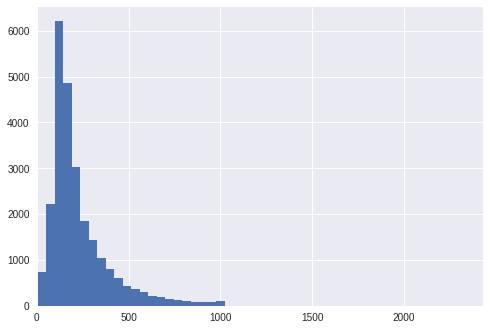

In [26]:
# test
plt.figure()
plt.hist(x_test_len, bins=50)
plt.xlim(xmin=0)
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')


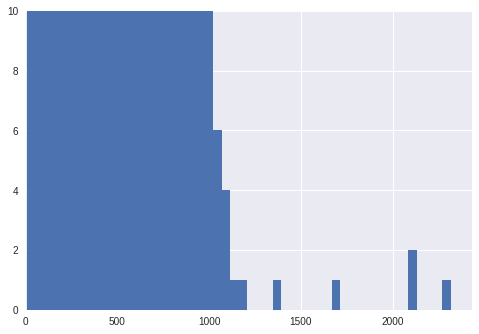

In [27]:
# test, 拡大
plt.figure()
plt.hist(x_test_len, bins=50)
plt.xlim(xmin=0)
plt.ylim(0,10)
plt.show()

## データの前処理

長さが揃っていないlistのarrayを、`(len(sequences), maxlen)`というサイズの2次元arrayにします。(長さを揃える)　　

`pad_sequences(sequences, maxlen=None, dtype='int32', padding='pre', truncating='pre', value=0.0)`  
- `sequences` :　整形したいデータ(listのarray)。
- `maxlen` : 出力の系列の長さ。`None`の場合は入力の中の最大長。
- `dtype` : データの要素の型。
- `padding` : `'pre'`, `'post'`のどちらか。系列長が`maxlen`に足りない場合に、前後どちらにパディングをするか。
- `truncating` : `'pre'`, `'post'`のどちらか。系列長が`maxlen`より長い場合に、前後どちらを削るか。
- `value` : パディングで使う値。

In [0]:
from keras.preprocessing.sequence import pad_sequences

In [0]:
maxlen = 500
x_train_pad = pad_sequences(train[0], maxlen = maxlen)
x_test_pad = pad_sequences(test[0], maxlen = maxlen)

データが多く、全て使うと学習に時間がかかるため、  
train : 10000データ  
validation : 1000データ  
test : 1000データ  
とします。

In [0]:
x_train = x_train_pad[:10000]
y_train = train[1][:10000]
x_valid = x_test_pad[:1000]
y_valid = test[1][:1000]
x_test = x_test_pad[1000:2000]
y_test = test[1][1000:2000]

In [31]:
print(y_train.sum())
print(y_valid.sum())
print(y_test.sum())

5053
474
479


# モデルの構築

次のようなモデルを作成します。

入力　ー　Embedding　ー　LSTM(50)　ー　Dense(1)　ー　出力

Embedding : 整数のラベルがついたデータを実数のベクトルに変換する操作。onehotエンコーディングに近いものです。

## Sequentialモデル

`keras.models.Sequential`を使えば、層を一つずつ重ねていくことでモデルを設計できます。

なお、tensorflowなどのように関数を適用していくことでモデルを設計する方法も可能です。(Functional API)

In [0]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.layers.embeddings import Embedding

Sequentialモデルを表す変数`model`に対して、`add()`関数を実行することで層を追加できます。  
その後、`compile()`によって計算グラフを確定させます。

#### `Embedding(input_dim, output_dim, mask_zero=False, input_length=None, ...)`
- `input_dim` : 入力の整数ラベルの最大値。
- `output_dim` : 各ラベルを何次元のベクトルに変換するか。
- `mask_zero` : `True`または`False`。０をマスクされた特別な値として扱うか。`True`の場合は`input_dim`の値を+1する必要がある。
- `input_length` : 入力する系列の長さ。

#### `Dense(units, activation=None, ...)`
- `units` : ニューロンの数＝出力ベクトルの次元。
- `activation` : 活性化関数。指定しない場合は`f(x) = x`という線形関数になる。

#### `LSTM(units, return_sequences=False, ...)`
- `units` : LSTM層のユニット数。
- `return_sequences` : 各時点の出力全てを並べた系列を出力するかどうか。`False`なら最後の出力だけを返す。

#### `compile(loss=None, optimizer=None, metrics=None)`
- `loss` : 損失関数。kerasにある関数を文字列で指定するか、自分で作成した損失関数を与えることができる。
- `optimizer` : 最適化手法。文字列または作成したoptimizerインスタンス。
- `metrics` : 評価関数のリスト。リストの要素は文字列か作成した評価関数。

In [33]:
model = Sequential()
model.add(Embedding(max_index+1, 100, mask_zero=True, input_length=maxlen))
model.add(LSTM(51))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


### 作成したモデルの構造

In [34]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 100)          8858700   
_________________________________________________________________
lstm_1 (LSTM)                (None, 51)                31008     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 52        
Total params: 8,889,760
Trainable params: 8,889,760
Non-trainable params: 0
_________________________________________________________________


#### モデルをグラフで表現(スライドにある図)
`model.png`という画像ファイルが作成されます。  
※　実行するためには追加のライブラリが必要です。  
pythonのライブラリである pydot と、pythonのライブラリではない　graphviz というものです。

In [0]:
from keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='model.png')

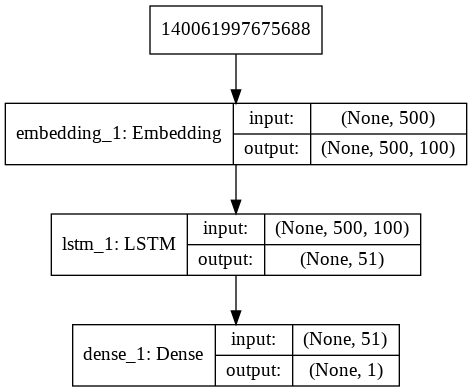

In [36]:
from IPython.display import Image,display_png,display_jpeg
display_png(Image('model.png'))

### モデルの保存

コールバックを利用してモデルの情報をファイルに保存します。

#### `ModelCheckpoint(filepath, monitor='val_loss', save_best_only=False, mode='auto', ...)`
- `filepath` : モデルを保存する場所、ファイル名の指定。
- `monitor` : モデルの評価指標とする値。
- `save_best_only` : これまでの学習の中で最善のモデルとなった場合にのみモデルを保存するかどうか。
- `mode` : `'auto'`, `'min'`, `'max'`のいずれか。評価指標の値がどうなることが望ましいのかを指定。

In [0]:
from keras.callbacks import ModelCheckpoint

In [0]:
callbacks = []
callbacks.append(ModelCheckpoint('model.hdf5', save_best_only=True))

## 学習

#### `fit(x, y, batch_size=None, epochs=1, callbacks=None, validation_split=0, validation_data=None, shuffle=True, ...)`
- `x` : トレーニングデータの説明変数。
- `y` : トレーニングデータの正解値。
- `batch_size` : 学習時のミニバッチのサイズ。
- `epochs` : ミニバッチに分けた学習をトレーニングデータ何周分行うか。
- `callbacks` : コールバック。
- `validation_split` : 0〜1の値を設定すると、与えたデータ `x`, `y`のうちその割合のデータをバリデーション(検証)データとして扱う。
- `validation_data` : `(x_validation, y_validation)`という形式で直接バリデーションデータを指定できる。
- `shuffle` : epochごとにトレーニングデータの順番をシャッフルするかどうか。

返り値 : 学習の途中状態を記録したhistoryデータ。

In [39]:
# 時間がかかります
history = model.fit(x_train, y_train, batch_size=500, epochs=3, validation_data=(x_valid, y_valid), callbacks=callbacks)

Instructions for updating:
Use tf.cast instead.
Train on 10000 samples, validate on 1000 samples
Epoch 1/3
10000/10000 [==============================] - 32s 3ms/step - loss: 0.6878 - acc: 0.5768 - val_loss: 0.6734 - val_acc: 0.6580
Epoch 2/3
10000/10000 [==============================] - 29s 3ms/step - loss: 0.5687 - acc: 0.7565 - val_loss: 0.4535 - val_acc: 0.8020
Epoch 3/3
10000/10000 [==============================] - 29s 3ms/step - loss: 0.3076 - acc: 0.8805 - val_loss: 0.3618 - val_acc: 0.8430


### 保存したモデルの復元

ライブラリ： h5py

In [0]:
from keras.models import load_model

In [0]:
best_model = load_model('model.hdf5')

In [0]:
pred = best_model.predict(x_test)

In [43]:
pred

array([[0.05682158],
       [0.86583817],
       [0.15038031],
       [0.30508497],
       [0.05959675],
       [0.27984777],
       [0.06237614],
       [0.05194741],
       [0.1510047 ],
       [0.1221742 ],
       [0.15031722],
       [0.9346842 ],
       [0.85672504],
       [0.11815831],
       [0.7234682 ],
       [0.08005062],
       [0.22010005],
       [0.37564474],
       [0.95766395],
       [0.7370384 ],
       [0.70060194],
       [0.77044463],
       [0.9067599 ],
       [0.12224871],
       [0.10282499],
       [0.10553989],
       [0.889912  ],
       [0.05647194],
       [0.40691078],
       [0.09879002],
       [0.05736193],
       [0.9558891 ],
       [0.94314134],
       [0.26736355],
       [0.6005367 ],
       [0.03545466],
       [0.697072  ],
       [0.07282567],
       [0.58396316],
       [0.23298323],
       [0.06047562],
       [0.84391856],
       [0.85259926],
       [0.0458062 ],
       [0.8207288 ],
       [0.2733575 ],
       [0.1770941 ],
       [0.040

### テストデータに対する予測精度

In [44]:
[test_loss, accuracy] = best_model.evaluate(x_test, y_test)
print('loss : ', test_loss)
print('acc : ', accuracy)

1000/1000 [==============================] - 15s 15ms/step
loss :  0.36857970762252806
acc :  0.836


### `history`から学習の様子を確認

In [45]:
history.history

{'acc': [0.5768000036478043, 0.7565000027418136, 0.880500003695488],
 'loss': [0.6877816528081894, 0.5686925545334816, 0.30757385566830636],
 'val_acc': [0.6579999923706055, 0.8019999861717224, 0.8429999947547913],
 'val_loss': [0.6733608543872833, 0.45350609719753265, 0.3617803305387497]}

In [49]:
plt.figure()

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

## 上位10,000語だけを用いた場合
上位10,000語以外は未知の単語としてインデックス2を割り当てます。

In [0]:
train, test = imdb.load_data(num_words=10000) # 上位10,000語以外は未知の単語とする
max_index = 10000

In [0]:
# データの一部を使用
maxlen =500
x_train_pad = pad_sequences(train[0], maxlen = maxlen)
x_test_pad = pad_sequences(test[0], maxlen = maxlen)
x_train = x_train_pad[:10000]
y_train = train[1][:10000]
x_valid = x_test_pad[:1000]
y_valid = test[1][:1000]
x_test = x_test_pad[1000:2000]
y_test = test[1][1000:2000]

In [0]:
model2 = Sequential()
model2.add(Embedding(max_index+1, 100, mask_zero=True, input_length=maxlen))
model2.add(LSTM(100))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [53]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 100)          1000100   
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 1,080,601
Trainable params: 1,080,601
Non-trainable params: 0
_________________________________________________________________


In [0]:
callbacks2 = []
callbacks2.append(ModelCheckpoint('model2.hdf5', save_best_only=True))

In [55]:
# 時間がかかります
history = model2.fit(x_train, y_train, batch_size=500, epochs=10, validation_data=(x_valid, y_valid), callbacks=callbacks2)

Train on 10000 samples, validate on 1000 samples
Epoch 1/10
10000/10000 [==============================] - 31s 3ms/step - loss: 0.6654 - acc: 0.5907 - val_loss: 0.5240 - val_acc: 0.7670
Epoch 2/10
10000/10000 [==============================] - 30s 3ms/step - loss: 0.4146 - acc: 0.8276 - val_loss: 0.3628 - val_acc: 0.8510
Epoch 3/10
10000/10000 [==============================] - 30s 3ms/step - loss: 0.2570 - acc: 0.9039 - val_loss: 0.3243 - val_acc: 0.8770
Epoch 4/10
10000/10000 [==============================] - 30s 3ms/step - loss: 0.1612 - acc: 0.9449 - val_loss: 0.3050 - val_acc: 0.8730
Epoch 5/10
10000/10000 [==============================] - 30s 3ms/step - loss: 0.1213 - acc: 0.9628 - val_loss: 0.3618 - val_acc: 0.8700
Epoch 6/10
10000/10000 [==============================] - 30s 3ms/step - loss: 0.0969 - acc: 0.9727 - val_loss: 0.4645 - val_acc: 0.8500
Epoch 7/10
10000/10000 [==============================] - 30s 3ms/step - loss: 0.0763 - acc: 0.9796 - val_loss: 0.3748 - val_acc:

In [56]:
ls

model2.hdf5  model.hdf5  model.png  sample_data/


## 双方向モデル

`keras.layers.wrappers.Bidirectional`　を使用することでRNNを簡単に双方向モデルにすることができます。

In [0]:
from keras.layers.wrappers import Bidirectional

In [58]:
max_index

10000

In [59]:
bi_model = Sequential()
bi_model.add(Embedding(max_index+1, 100, mask_zero=True, input_length=maxlen))
bi_model.add(Bidirectional(LSTM(50)))
bi_model.add(Dense(1, activation='sigmoid'))

bi_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

callbacks = []
callbacks.append(ModelCheckpoint('bi_model.hdf5', save_best_only=True))

# 時間がかかります
bi_hist = bi_model.fit(x_train, y_train, batch_size=500, epochs=10, validation_data=(x_valid, y_valid), callbacks=callbacks) 

Train on 10000 samples, validate on 1000 samples
Epoch 1/10
10000/10000 [==============================] - 62s 6ms/step - loss: 0.6872 - acc: 0.5849 - val_loss: 0.6718 - val_acc: 0.6350
Epoch 2/10
10000/10000 [==============================] - 60s 6ms/step - loss: 0.5339 - acc: 0.7693 - val_loss: 0.4115 - val_acc: 0.8110
Epoch 3/10
10000/10000 [==============================] - 60s 6ms/step - loss: 0.3364 - acc: 0.8579 - val_loss: 0.3935 - val_acc: 0.8200
Epoch 4/10
10000/10000 [==============================] - 60s 6ms/step - loss: 0.2405 - acc: 0.9149 - val_loss: 0.3242 - val_acc: 0.8620
Epoch 5/10
10000/10000 [==============================] - 61s 6ms/step - loss: 0.1828 - acc: 0.9380 - val_loss: 0.3384 - val_acc: 0.8520
Epoch 6/10
10000/10000 [==============================] - 60s 6ms/step - loss: 0.1348 - acc: 0.9560 - val_loss: 0.3688 - val_acc: 0.8570
Epoch 7/10
10000/10000 [==============================] - 60s 6ms/step - loss: 0.0988 - acc: 0.9709 - val_loss: 0.3731 - val_acc:

In [60]:
best_bi_model = load_model('bi_model.hdf5')
[test_loss, accuracy] = best_bi_model.evaluate(x_test, y_test)
print('loss : ', test_loss)
print('acc : ', accuracy)

1000/1000 [==============================] - 31s 31ms/step
loss :  0.3450738859176636
acc :  0.857
